# RF

Mounted at /content/drive


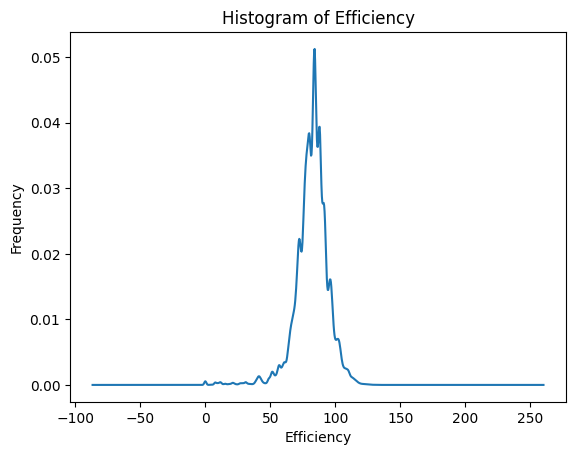

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer

data_folder = '/content/drive/MyDrive/2months_data'
all_files = os.listdir(data_folder)
csv_files = [os.path.join(data_folder, f) for f in all_files if f.endswith('.csv')]

def read_csv_file(file_path):
    encodings = ['utf-8', 'cp949', 'euc-kr']  # List of possible encodings
    for encoding in encodings:
        try:
            return pd.read_csv(file_path, encoding=encoding)
        except (UnicodeDecodeError, pd.errors.EmptyDataError, pd.errors.ParserError):
            continue
    raise ValueError(f"Could not read file {file_path} with any encoding.")

valid_dataframes = []
for file in csv_files:
    try:
        df = read_csv_file(file)
        if not df.empty:
          valid_dataframes.append(df)
    except ValueError as e:
        print(e)

if valid_dataframes:
    combined_data = pd.concat(valid_dataframes, ignore_index=True)
else:
    combined_data = pd.DataFrame()
combined_data.columns=["Creation date", "load factor", "Set Pressure", "Boiler Pressure",
                      "Blower Inverter Output", "Blower Input", "Water Supply Pump",
                      "Water Supply Pump Input", "Gas Damper", "Gas Damper Input",
                      "Air Damper", "Air Damper Input", "Recirculation Damper",
                      "Recirculation External Damper", "Recirculation Damper Input",
                      "Recirculation External Damper Input", "Water Supply Level",
                      "Boiler Temperature", "Exhaust Gas Temperature 1",
                      "Exhaust Gas Temperature 2", "Exhaust Gas Temperature 3",
                      "Exhaust Recirculation Temperature", "Economizer Temperature 1",
                      "Economizer Temperature 2", "Burner Temperature", "Exhaust Gas NOx",
                      "Exhaust Gas O2", "Recirculation O2", "Recirculation NOx",
                      "Water Supply Amount (Cumulative Flow)",
                      "Water Supply Amount (Instantaneous Flow)",
                      "Fuel Amount (Cumulative Flow)", "Fuel Amount (Instantaneous Flow)",
                      "Efficiency (Instantaneous)", "Power Consumption", "Vibration Sensor 1",
                      "Vibration Sensor 2", "Operating Time", "Normal Operation Probability",
                      "Blower Failure Probability", "Air Damper Failure Probability",
                      "Gas Damper Failure Probability", "Probability Update Time",
                      "Instantaneous Steam Amount", "Input-Output Efficiency",
                      "Heat Loss Efficiency", "Efficiency (input/output method-steam)"]

combined_data = combined_data.reset_index()
combined_data = combined_data.shift(periods=1, axis=1)
combined_data = combined_data.drop(columns=['index'])
combined_data = combined_data[combined_data['load factor'] != 0]

combined_data = combined_data.drop(columns=[
    "Creation date","Power Consumption","Vibration Sensor 1","Vibration Sensor 2","Operating Time",
    "Normal Operation Probability","Blower Failure Probability","Air Damper Failure Probability",
    "Gas Damper Failure Probability","Probability Update Time","Instantaneous Steam Amount",
    "Input-Output Efficiency","Heat Loss Efficiency","Efficiency (Instantaneous)",
    "Exhaust Recirculation Temperature","Burner Temperature"
])

numeric_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns
combined_data[numeric_columns] = combined_data[numeric_columns].apply(lambda col: col.fillna(col.mean()))

# scaler = StandardScaler()
# combined_data[numeric_columns] = scaler.fit_transform(combined_data[numeric_columns])

# # Encode categorical variables (if any)
# label_encoder = LabelEncoder()
# for column in combined_data.select_dtypes(include=['object']).columns:
#     combined_data[column] = label_encoder.fit_transform(combined_data[column])

# combined_data.to_csv('/content/drive/MyDrive/preprocessed_boiler_data.csv', index=False, encoding='utf-8')


import matplotlib.pyplot as plt

# 히스토그램
combined_data['Efficiency (input/output method-steam)'].plot(kind='density')
plt.xlabel('Efficiency')
plt.ylabel('Frequency')
plt.title('Histogram of Efficiency')
plt.show()

In [ ]:
combined_data.head()

,load factor,Set Pressure,Boiler Pressure,Blower Inverter Output,Blower Input,Water Supply Pump,Water Supply Pump Input,Gas Damper,Gas Damper Input,Air Damper,...,Economizer Temperature 2,Exhaust Gas NOx,Exhaust Gas O2,Recirculation O2,Recirculation NOx,Water Supply Amount (Cumulative Flow),Water Supply Amount (Instantaneous Flow),Fuel Amount (Cumulative Flow),Fuel Amount (Instantaneous Flow),Efficiency (input/output method-steam)
0,30.0,5.6,5.7,55.0,53.6,0.0,0,20.0,20.0,25.0,...,59.6,20.0,4.0,0,0,9989.87,0.0,668359.0,63.3,66.92
1,30.0,5.6,5.7,55.0,53.7,0.0,0,20.0,20.2,25.0,...,59.6,19.0,4.0,0,0,9989.87,0.0,668359.0,63.2,67.03
2,20.0,5.6,5.7,49.0,53.6,0.0,0,15.0,20.3,20.0,...,59.6,19.0,4.0,0,0,9989.87,0.0,668359.0,63.1,67.13
3,20.0,5.6,5.7,49.0,52.0,0.0,0,15.0,20.2,20.0,...,59.6,19.0,4.0,0,0,9989.87,0.0,668359.0,62.7,67.56
4,20.0,5.6,5.7,49.0,50.0,0.0,0,15.0,15.6,20.0,...,59.5,19.0,4.0,0,0,9989.87,0.0,668359.0,61.7,68.66


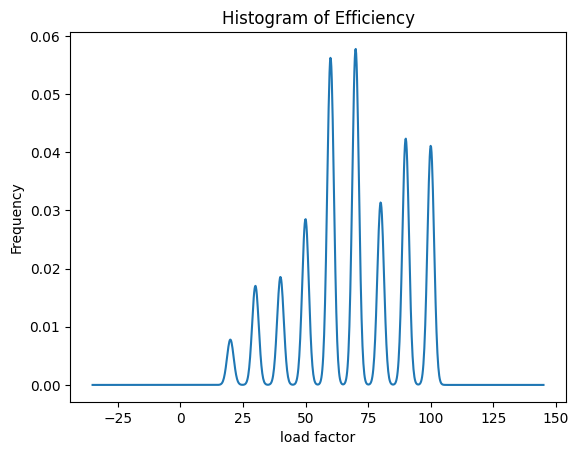

In [ ]:
combined_data['load factor'].plot(kind='density')
plt.xlabel('load factor')
plt.ylabel('Frequency')
plt.title('Histogram of Efficiency')
plt.show()

In [ ]:
combined_data = combined_data[combined_data['load factor'] != 0]

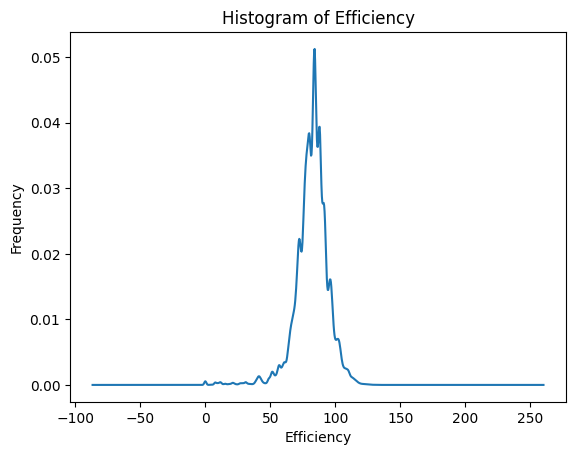

In [ ]:
combined_data['Efficiency (input/output method-steam)'].plot(kind='density')
plt.xlabel('Efficiency')
plt.ylabel('Frequency')
plt.title('Histogram of Efficiency')
plt.show()

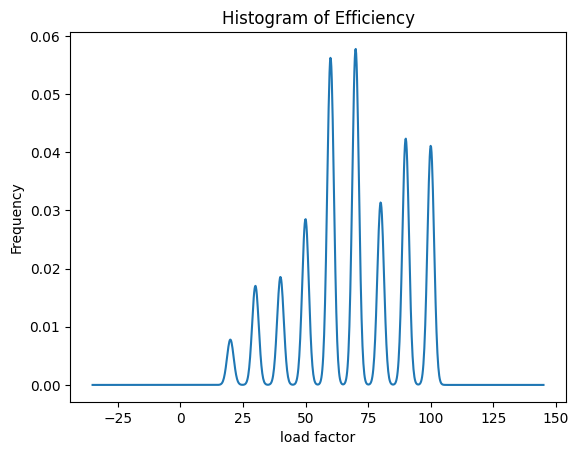

In [ ]:
combined_data['load factor'].plot(kind='density')
plt.xlabel('load factor')
plt.ylabel('Frequency')
plt.title('Histogram of Efficiency')
plt.show()

In [ ]:
scaler = RobustScaler()
combined_data[numeric_columns] = scaler.fit_transform(combined_data[numeric_columns])

combined_data.to_csv('/content/drive/MyDrive/preprocessed_boiler_data.csv', index=False, encoding='utf-8')

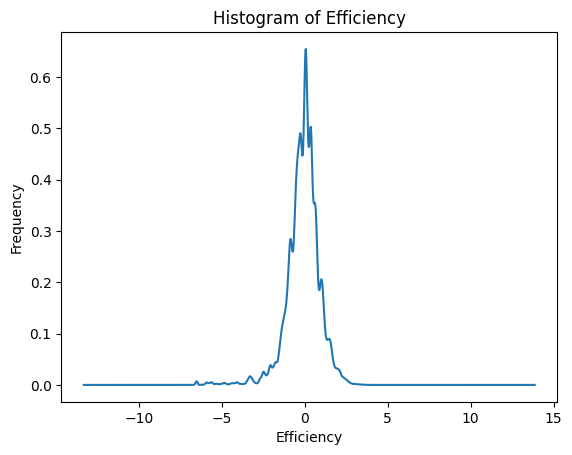

In [ ]:
combined_data['Efficiency (input/output method-steam)'].plot(kind='density')
plt.xlabel('Efficiency')
plt.ylabel('Frequency')
plt.title('Histogram of Efficiency')
plt.show()

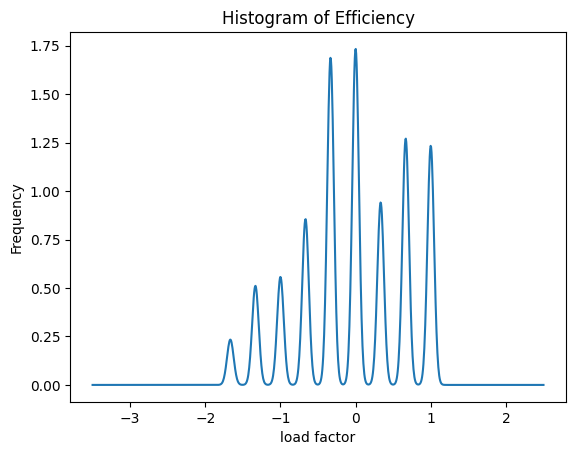

In [ ]:
combined_data['load factor'].plot(kind='density')
plt.xlabel('load factor')
plt.ylabel('Frequency')
plt.title('Histogram of Efficiency')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import randint

# combined_data = 전처리된 데이터프레임 (전처리 코드는 이미 실행된 상태라고 가정)
combined_data = read_csv_file('/content/drive/MyDrive/preprocessed_boiler_data.csv')

# 독립 변수(X)와 종속 변수(y) 설정
X = combined_data.drop(columns=['Efficiency (input/output method-steam)'])  # 종속 변수 제외
y = combined_data['Efficiency (input/output method-steam)']

# 데이터 분할: 훈련 데이터와 테스트 데이터로 분할
# 여기에서 train_test_split을 사용하여 X_train, X_test, y_train, y_test를 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 예시: 80% 훈련, 20% 테스트

# Random Forest Model with RandomizedSearchCV for hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_distributions = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 15, 20, 25],           # Maximum depth of the tree
    'min_samples_split': [2,5,10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1,2,4],    # Minimum number of samples required to be at a leaf node
    'max_features':['sqrt', 'log2'],  # Number of features to consider at each split
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]  # 리프 노드의 가중치 샘플 최소값
}

# Randomized Search CV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

# Best parameters
print("Best hyperparameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Model evaluation using test data
y_pred = random_search.predict(X_test)

# Calculate performance metrics
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = np.mean(np.abs(y_test - y_pred))
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
mse = np.mean((y_test - y_pred) ** 2)

print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters found by RandomizedSearchCV:
{'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
MAPE: inf
MAE: 0.2781
RMSE: 0.3899
MSE: 0.1520


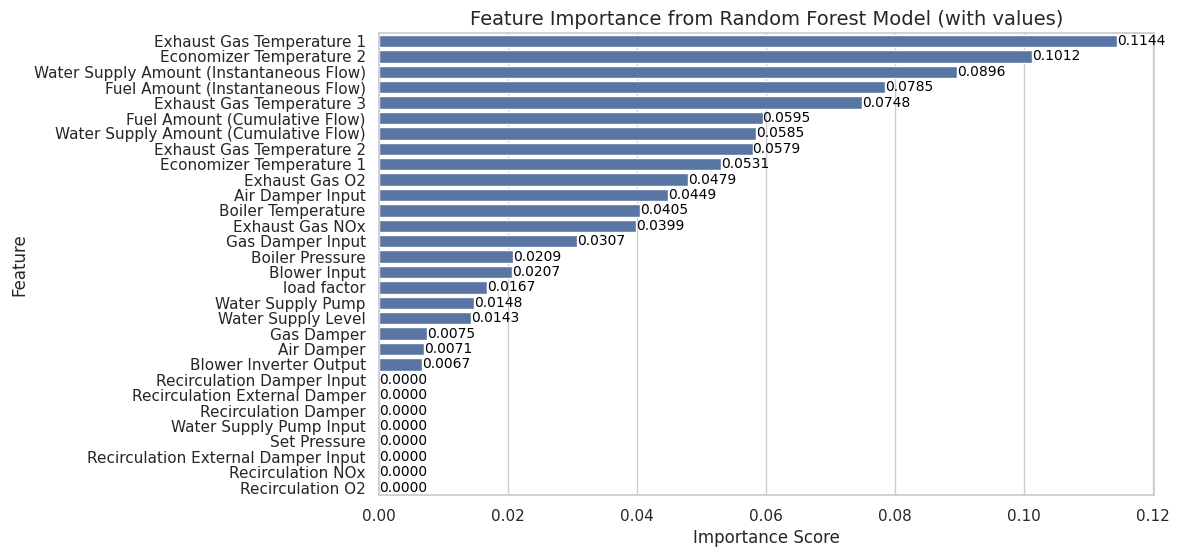

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
import shutil

# Seaborn 스타일 적용
sns.set(style="whitegrid")

# 예시 데이터 (random_search.best_estimator_는 미리 학습된 상태여야 함)
feature_importances = random_search.best_estimator_.feature_importances_
features = X.columns  # 각 피처의 이름

# 피처 중요도를 시리즈로 변환하고, 중요도 순서대로 정렬
feature_importance_series = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance_series, y=feature_importance_series.index)

# 각 바에 중요도 값을 텍스트로 표시
for i, (value, name) in enumerate(zip(feature_importance_series, feature_importance_series.index)):
    ax.text(value, i, f'{value:.4f}', va='center', ha='left', fontsize=10, color='black')

plt.title('Feature Importance from Random Forest Model (with values)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

# GA에 사용할 RF - importance score 상위 16개 추출

MAPE (Filtered): inf
MAE (Filtered): 0.2343
RMSE (Filtered): 0.3408
MSE (Filtered): 0.1162


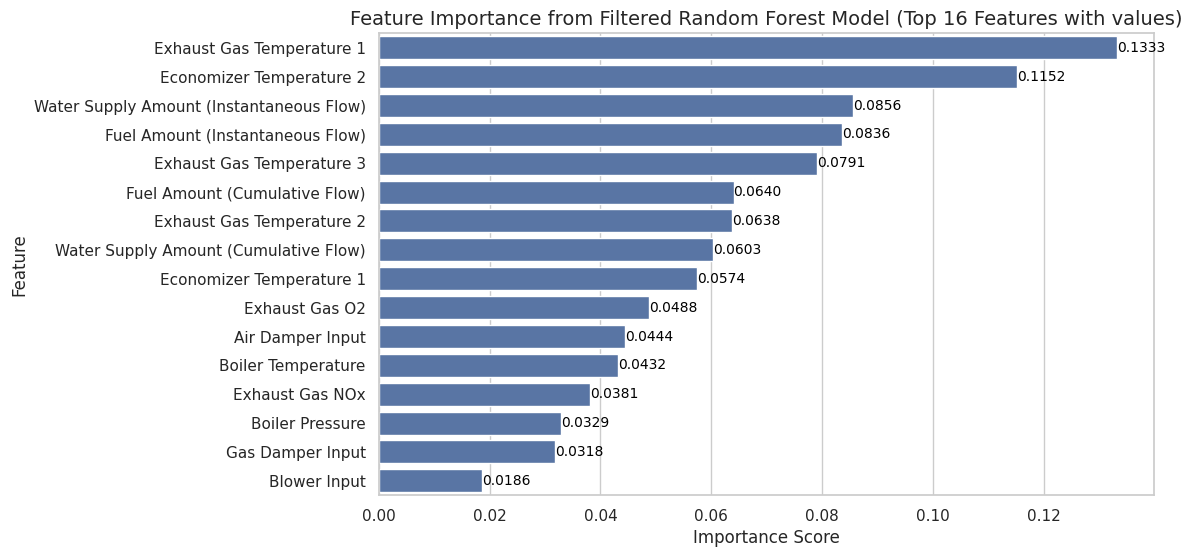

In [ ]:
# Step 1: Random Search에서 찾은 최적의 하이퍼파라미터를 적용한 새로운 Random Forest 모델 학습
best_params = random_search.best_params_  # 이전 RandomizedSearchCV에서 찾은 최적의 하이퍼파라미터

# Feature Importance 상위 16개의 피처들만 선택
top_n = 16
important_features = feature_importance_series.sort_values(ascending=False).head(top_n).index
X_filtered = X[important_features]  # 상위 16개 피처들만 사용

# 데이터 분할: 훈련 데이터와 테스트 데이터로 다시 분할
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# 새로운 Random Forest 모델 생성 (최적 하이퍼파라미터 사용)
rf_filtered = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    min_weight_fraction_leaf=best_params['min_weight_fraction_leaf'],
    random_state=42
)

# 모델 학습
rf_filtered.fit(X_train_filtered, y_train)

# Step 2: 모델 평가
y_pred_filtered = rf_filtered.predict(X_test_filtered)

# 성능 지표 계산
mape_filtered = np.mean(np.abs((y_test - y_pred_filtered) / y_test)) * 100
mae_filtered = np.mean(np.abs(y_test - y_pred_filtered))
rmse_filtered = np.sqrt(np.mean((y_test - y_pred_filtered) ** 2))
mse_filtered = np.mean((y_test - y_pred_filtered) ** 2)

print(f"MAPE (Filtered): {mape_filtered:.4f}")
print(f"MAE (Filtered): {mae_filtered:.4f}")
print(f"RMSE (Filtered): {rmse_filtered:.4f}")
print(f"MSE (Filtered): {mse_filtered:.4f}")

# Step 3: Feature Importance 시각화 (필터링된 피처만)
feature_importances_filtered = rf_filtered.feature_importances_

# 피처 중요도 시리즈로 변환하고 중요도 순서대로 정렬
feature_importance_series_filtered = pd.Series(feature_importances_filtered, index=important_features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance_series_filtered, y=feature_importance_series_filtered.index)

# 각 바에 중요도 값을 텍스트로 표시
for i, (value, name) in enumerate(zip(feature_importance_series_filtered, feature_importance_series_filtered.index)):
    ax.text(value, i, f'{value:.4f}', va='center', ha='left', fontsize=10, color='black')

plt.title('Feature Importance from Filtered Random Forest Model (Top 16 Features with values)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


# GA

In [ ]:
!pip install deap

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution

# Step 1: 상위 16개 피처의 실제 값 범위를 기반으로 bounds 설정
bounds = [(combined_data[feature].min(), combined_data[feature].max()) for feature in important_features]

# Step 2: RF 모델 예측 함수 정의
def rf_predict(input_features):
    """입력된 피처 조합으로 RF 모델의 예측 결과를 반환하는 함수."""
    input_features = pd.DataFrame([input_features], columns=important_features)  # 피처 이름 명시
    return rf_filtered.predict(input_features)[0]

# Step 3: 손실 함수 정의 (목표 효율성에 따른 오차 최소화)
target_efficiency = 0.95  # 목표 효율성 값

def loss_function(x):
    """손실 함수: 예측된 효율성과 목표 효율성 값 간의 오차를 반환."""
    predicted_efficiency = rf_predict(x)
    # 목표 효율성과의 절대 차이를 손실로 정의하여 최소화
    loss = abs(predicted_efficiency - target_efficiency) / target_efficiency  # 상대 오차
    return loss

# Step 4: 유전 알고리즘 설정 및 최적화 실행
result = differential_evolution(loss_function, bounds, maxiter=100, popsize=15, tol=1e-3)

# 최적화 결과 출력
print("GA를 통해 찾은 최적의 피처 값 조합:", result.x)
print("최소 손실 함수 값:", result.fun)

# 최적화된 조합에서 예측된 효율성 값
optimized_efficiency = rf_predict(result.x)
print(f"최적화된 조합에서 예측된 효율성 값: {optimized_efficiency:.4f}")

# Step 5: 최적화된 피처 조합의 상세 정보 출력
print("\n최적화된 조합에서 각 피처 값:")
for feature, value in zip(important_features, result.x):
    print(f"{feature}: {value:.4f}")


GA를 통해 찾은 최적의 피처 값 조합: [ 0.20108417  2.19521206  0.54530948 -0.87512871  2.33271181  0.51325101
 -0.43804819 -0.44747135  2.95159038  1.99072631 -0.57089982 -8.5793383
  3.0603773   0.28271949 -7.47095046 -0.26841303]
최소 손실 함수 값: 9.636463909174236e-06
최적화된 조합에서 예측된 효율성 값: 0.9500

최적화된 조합에서 각 피처 값:
Exhaust Gas Temperature 1: 0.2011
Economizer Temperature 2: 2.1952
Water Supply Amount (Instantaneous Flow): 0.5453
Fuel Amount (Instantaneous Flow): -0.8751
Exhaust Gas Temperature 3: 2.3327
Fuel Amount (Cumulative Flow): 0.5133
Water Supply Amount (Cumulative Flow): -0.4380
Exhaust Gas Temperature 2: -0.4475
Economizer Temperature 1: 2.9516
Exhaust Gas O2: 1.9907
Air Damper Input: -0.5709
Boiler Temperature: -8.5793
Exhaust Gas NOx: 3.0604
Gas Damper Input: 0.2827
Boiler Pressure: -7.4710
Blower Input: -0.2684


In [ ]:
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# FutureWarning 무시 설정
warnings.simplefilter(action='ignore', category=FutureWarning)

# 최적화된 상태의 데이터프레임 생성 (예시 코드)
optimized_data = pd.DataFrame(columns=combined_data.columns)
optimized_data.loc[0] = [0 for _ in range(len(combined_data.columns))]

# 최적화된 피처 값 대입
for i, col in enumerate(important_features):
    if combined_data[col].dtype == 'int64':
        optimized_data.loc[0, col] = int(round(result.x[i]))  # int형으로 변환 후 할당
    else:
        optimized_data.loc[0, col] = float(result.x[i])  # float형으로 변환 후 할당

# 예측된 효율성 값 설정
optimized_data['Efficiency (input/output method-steam)'] = float(optimized_efficiency)

# 스케일링 복구 - 숫자형 열에 대해 StandardScaler로 역변환
numeric_columns = combined_data.select_dtypes(include=[np.number]).columns  # 숫자형 열 선택
optimized_data[numeric_columns] = scaler.inverse_transform(optimized_data[numeric_columns].values)

# 최적화된 데이터 출력
print("최적화된 데이터 (복구된 상태):")
optimized_data.head()

최적화된 데이터 (복구된 상태):


,load factor,Set Pressure,Boiler Pressure,Blower Inverter Output,Blower Input,Water Supply Pump,Water Supply Pump Input,Gas Damper,Gas Damper Input,Air Damper,...,Economizer Temperature 2,Exhaust Gas NOx,Exhaust Gas O2,Recirculation O2,Recirculation NOx,Water Supply Amount (Cumulative Flow),Water Supply Amount (Instantaneous Flow),Fuel Amount (Cumulative Flow),Fuel Amount (Instantaneous Flow),Efficiency (input/output method-steam)
0,70.0,5.6,3.80581,81.0,74.998026,75.0,0.0,40.0,50.795182,45.0,...,79.912709,37.241509,5.189799,0.0,0.0,9482.329852,3.621413,664269.736204,74.842741,95.341617


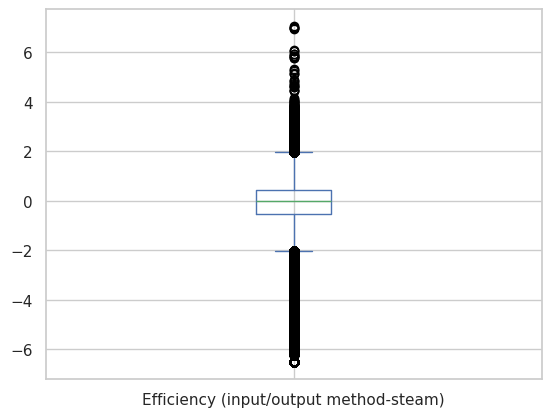

In [ ]:
combined_data['Efficiency (input/output method-steam)'].plot(kind='box')
plt.show()
